# Лабораторная работа 2

## Линейная регрессия

В данной лабораторной работе вам могут быть полезны следующие материалы:

https://education.yandex.ru/handbook/ml

https://github.com/esokolov/ml-course-hse

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).
На лекциях было показано, что в этом случае проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k.$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени — это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} =
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ — это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} =
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест

После того как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2.$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна библиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

При выполнении этой лабораторной вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

In [107]:
import numpy as numpy
import scipy.linalg as sla
from sklearn.model_selection import train_test_split
# import seaborn as sns
# sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

### Задание 1. Метод наименьших квадратов (3 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором — тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — $n$ точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача — по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [333]:
data_train = numpy.loadtxt('train.txt', delimiter=',')
data_test = numpy.loadtxt('test.txt', delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$:

In [334]:
X_train = data_train[:, 0]
Y_train = data_train[:, 1]
X_test = data_test[:, 0]
Y_test = data_test[:, 1]

**1. [0.1 балла]** Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [335]:
n = X_train.shape[0]
temp = numpy.ones(n)
y = Y_train.reshape(n, 1)
A = numpy.concatenate((X_train.reshape(n,1), temp.reshape(n, 1)), axis=1) #теперь решим СЛУ Ax=y и найдем вектор a^, для которого длина разности Xa^-y минимальна
A_min = numpy.linalg.inv(A.T @ A) @ A.T @ y
k = A_min[0, 0]
b = A_min[1, 0]
print(f'{k:.4f}x + {b:.4f}')
#это задание также можно было реализовать встроенной в numpy функцией:
solution, residuals, rank, singular_values = numpy.linalg.lstsq(A, Y_train, None)
k, b = solution
print(f'{k:.4f}x + {b:.4f}')
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

2.2791x + 4.4332
2.2791x + 4.4332


**2. [0.15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

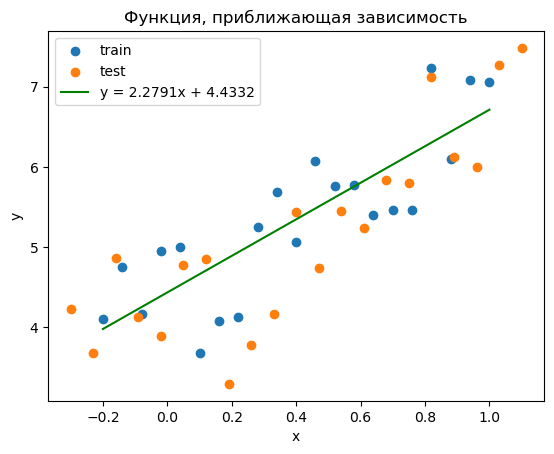

In [336]:
plt.title("Функция, приближающая зависимость")
plt.scatter(X_train, Y_train, label="train")
plt.scatter(X_test, Y_test, label="test")
x_values = numpy.linspace(X_train.min(), X_train.max(), 200)
linear_function = k * x_values + b
plt.plot(x_values, linear_function, color='green', label=f'y = {k:.4f}x + {b:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**3. [0.15 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и напечатайте его в виде $a_0 + a_1 x + \ldots a_k x^k$.

Для приближения с минимальной среднеквадратичной ошибкой используем интерполяционный многочлен Лагранжа. Для произвольного набора попарно различных точек 
$(x_{0}, y_{0}), \dots, (x_{n}, y_{n})$ существует единственный многочлен $f(x)$ степени не выше n, удовлетворяющий условиям $(f(x_{i}) = y_{i})$ для всех $(i = 0, 1, \dots, n)$. 

В данной задаче рассматривается 21 точка, следовательно, строится многочлен степени не выше 20.

In [340]:
V = numpy.vander(X_train, len(X_train))
L_coef, *_ = numpy.linalg.lstsq(V, Y_train, rcond=None)
terms = []
n = len(L_coef)
for i in range(n):
    coef = L_coef[i]
    power = n - i - 1
    sign = " - " if coef < 0 else " + "
    if power == 0:
        terms.append(f"{sign}{abs(coef):.4f}")
    elif power == 1:
        terms.append(f"{sign}{abs(coef):.4f} * x")
    else:
        terms.append(f"{sign}{abs(coef):.4f} * x^{power}")
polynomial_str = "".join(terms)
print(polynomial_str)
L_coef = numpy.flip(L_coef)
print(L_coef)

 - 13826671355.8893 * x^20 + 92564461441.0694 * x^19 - 261482272146.3133 * x^18 + 383057936129.3130 * x^17 - 243654046315.7885 * x^16 - 123184808632.3924 * x^15 + 408789413140.1673 * x^14 - 411580659506.7144 * x^13 + 236393115535.5763 * x^12 - 79620053512.9666 * x^11 + 11618475626.2002 * x^10 + 1932543268.8830 * x^9 - 1186467426.6218 * x^8 + 177627118.1246 * x^7 + 5492314.7197 * x^6 - 4452172.8578 * x^5 + 353182.1664 * x^4 + 15915.4021 * x^3 - 2629.0629 * x^2 + 27.4358 * x + 6.6008
[ 6.60084152e+00  2.74357796e+01 -2.62906292e+03  1.59154021e+04
  3.53182166e+05 -4.45217286e+06  5.49231472e+06  1.77627118e+08
 -1.18646743e+09  1.93254327e+09  1.16184756e+10 -7.96200535e+10
  2.36393116e+11 -4.11580660e+11  4.08789413e+11 -1.23184809e+11
 -2.43654046e+11  3.83057936e+11 -2.61482272e+11  9.25644614e+10
 -1.38266714e+10]


**4. [0.1 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок.

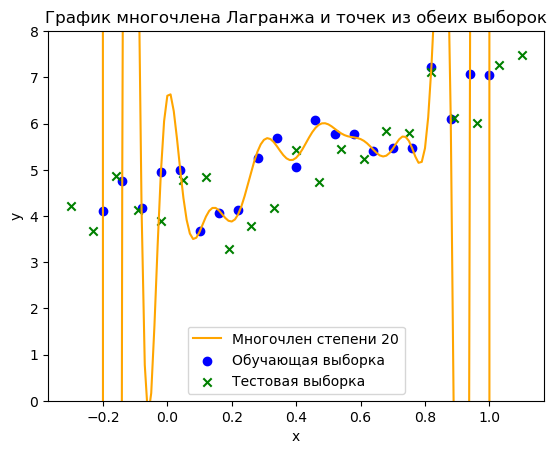

In [350]:
x_min, x_max = min(X_train.min(), X_test.min()), max(X_train.max(), X_test.max())
x_values = numpy.arange(x_min, x_max, 0.01)
x_vand = numpy.vander(x_values, len(L_coef), increasing=True)
y_values = x_vand @ L_coef.reshape(-1, 1)
plt.plot(x_values, y_values, color='orange', label=f'Многочлен степени {len(L_coef)-1}')
plt.scatter(X_train, Y_train, color='blue', label='Обучающая выборка')
plt.scatter(X_test, Y_test, color='green', marker='x', label='Тестовая выборка')
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([0, 8])
plt.title("График многочлена Лагранжа и точек из обеих выборок")
plt.legend()
plt.show()


**5. [0.25 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Напечатайте найденные многочлены в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [304]:
for k in range(1, 11):
    X = numpy.vstack([X_train**i for i in range(k + 1)]).T
    a = numpy.linalg.inv(X.T @ X) @ (X.T @ Y_train)
    Y = X @ a
    polynomial = [f'{a[0]}']
    for i in range(1, len(a)):
        sign = '+' if a[i] >= 0 else '-'
        polynomial.append(f'{sign} {abs(a[i])} * x^{i}')
    ans = ' '.join(polynomial)
    print(ans)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

4.433230905064936 + 2.279134498051949 * x^1
4.472476503404161 + 1.1578316883597353 * x^1 + 1.401628512115252 * x^2
4.46073635528505 + 1.0650161052853946 * x^1 + 1.8597508372604352 * x^2 - 0.38176860428802684 * x^3
4.341166120399777 + 1.1718023926381704 * x^1 + 6.794091784351622 * x^2 - 13.051328119981918 * x^3 + 7.918474697307829 * x^4
4.43129781382936 - 0.13059803992473462 * x^1 + 3.2747144018139807 * x^2 + 21.37479627627181 * x^3 - 51.13148138529505 * x^4 + 29.52497804131417 * x^5
4.383795011246775 - 4.597179325639445 * x^1 + 16.002903990533014 * x^2 + 121.25709713646211 * x^3 - 481.51013290695846 * x^4 + 581.453298268374 * x^5 - 229.97013342787977 * x^6
4.444512710961135 - 4.008895917708287 * x^1 + 7.215458598919213 * x^2 + 119.35078429197893 * x^3 - 314.2311724573374 * x^4 + 122.87821701169014 * x^5 + 238.6993678510189 * x^6 - 167.38196474313736 * x^7
4.6637890697275 - 5.182773537555477 * x^1 - 26.695630252361298 * x^2 + 268.8604371594265 * x^3 + 109.89566301554441 * x^4 - 3132.856

**6. [1 балл]** Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором — по парам из тестовых данных).

In [305]:
for k in range(1, 11):
    X_tr = numpy.vstack([X_train**i for i in range(k + 1)]).T
    X_te = numpy.vstack([X_test**i for i in range(k + 1)]).T
    a_tr = numpy.linalg.inv(X_tr.T @ X_tr) @ (X_tr.T @ Y_train)
    Y_tr = X_tr @ a_tr
    Y_te = X_te @ a_tr
    train_value = numpy.mean((Y_tr - Y_train)**2) #эта функция считает нужную нам формулу
    test_value = numpy.mean((Y_te - Y_test)**2)
    print(f"Среднеквадратическая ошибка на обучающих данных при степени {k}: {train_value}")
    print(f"Среднеквадратическая ошибка на тестовых данных при степени {k}: {test_value}")
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Среднеквадратическая ошибка на обучающих данных при степени 1: 0.2968966332625195
Среднеквадратическая ошибка на тестовых данных при степени 1: 0.43512020040488864
Среднеквадратическая ошибка на обучающих данных при степени 2: 0.26969891587669126
Среднеквадратическая ошибка на тестовых данных при степени 2: 0.3564762887831202
Среднеквадратическая ошибка на обучающих данных при степени 3: 0.26949718714796117
Среднеквадратическая ошибка на тестовых данных при степени 3: 0.35534645715179697
Среднеквадратическая ошибка на обучающих данных при степени 4: 0.2610665330579273
Среднеквадратическая ошибка на тестовых данных при степени 4: 0.4417270189288669
Среднеквадратическая ошибка на обучающих данных при степени 5: 0.24998504648317554
Среднеквадратическая ошибка на тестовых данных при степени 5: 0.5579732021820621
Среднеквадратическая ошибка на обучающих данных при степени 6: 0.1882934898837042
Среднеквадратическая ошибка на тестовых данных при степени 6: 2.581692932833377
Среднеквадратическ

Коэффициенты многочлена $\hat{f}_k$ степени $k$ вычисляются только на обучающей выборке с использованием метода наименьших квадратов, после чего полученная модель $\hat{f}_k(x)$ используется для предсказаний.
Коэффициенты не переобучаются на тестовой выборке, так как она используется исключительно для оценки качества модели.


**7. [0.75 балла]** Для $k = 1,2,3,4,5,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

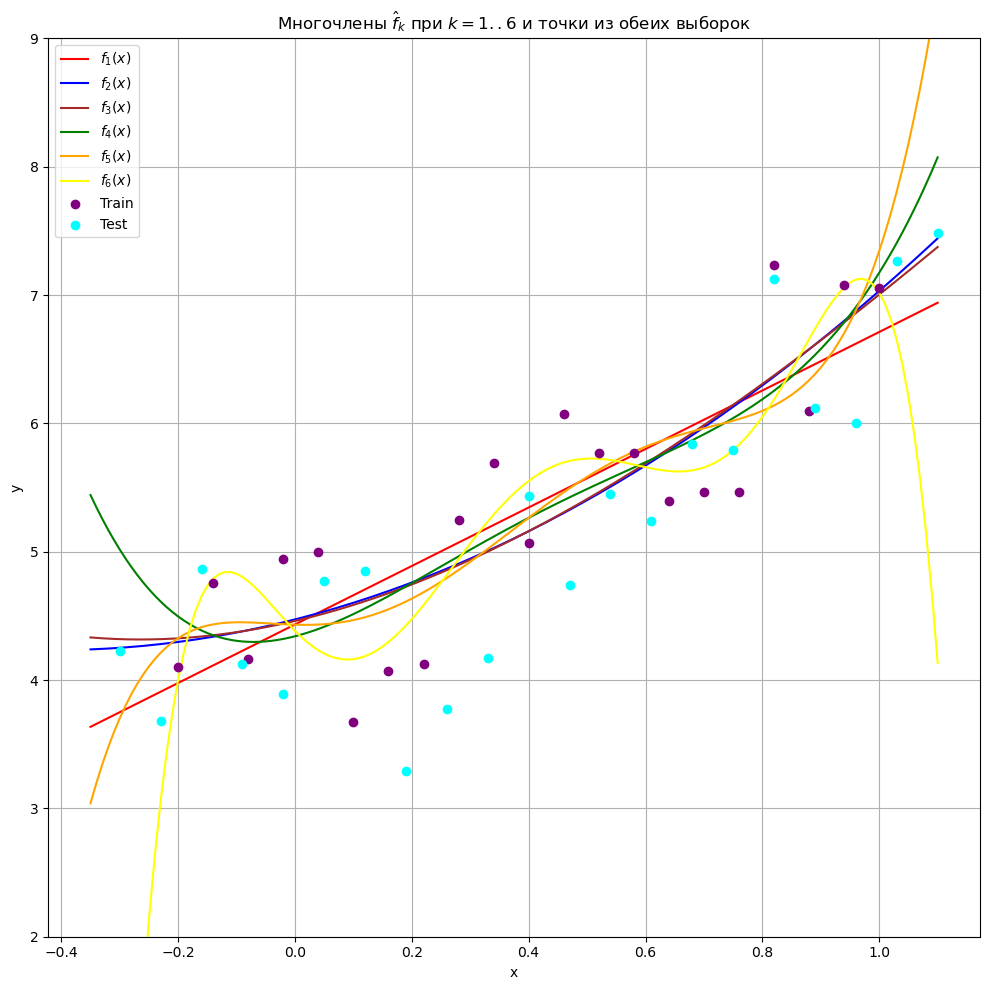

In [360]:
x_values = numpy.arange(min(X_train.min(), X_test.min()) - 0.05, max(X_test.max(), X_train.max()), 0.01)
plt.figure(figsize=(10, 10))
colors = ['red', 'blue', 'brown', 'green', 'orange', 'yellow']
for k in range(1, 7):
    x_training_plot = numpy.vstack([X_train**i for i in range(k + 1)]).T
    x_plot = numpy.vstack([x_values**i for i in range(k+1)]).T
    a = numpy.linalg.inv(x_training_plot.T @ x_training_plot) @ (x_training_plot.T @ Y_train)
    y_values = x_plot @ a
    plt.plot(x_values, y_values, label=f'$f_{k}(x)$', color=colors[k-1])
    # plt.text(x_values[0], y_values[0], f'$k={k}$', fontsize=9, color=colors[k - 1], ha='right', va='center')
plt.scatter(X_train, Y_train, color='purple', label='Train', zorder=5)
plt.scatter(X_test, Y_test, color='aqua', label='Test', zorder=5)
plt.title("Многочлены $\hat{f}_k$ при $k = 1..6$ и точки из обеих выборок")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.ylim(2, 9)
plt.legend()
plt.tight_layout()
plt.show()
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**8. [0.5 балла]** Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как, по вашему мнению, в машинном обучении называется наблюдаемый вами эффект?

Такая проблема называется переобучением: слишком сложная модель по сравнению с объемом доступных данных. Можно предположить, что с увеличением степени полинома увеличивается и точность, однако в некоторых случаях возникает ситуация, когда модель слишком сильно подстраивается под выборку, из-за чего возникают неточности, ошибки в измерениях, случайные отклонения. 

### Задание 2. Линейная регрессия (3.5 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split` с параметром `test_size=0.3`. Не забудьте зафиксировать параметр `random_state`.

In [155]:
flats_moscow_mod = numpy.loadtxt('flats_moscow_mod.txt', skiprows=1, encoding='latin1')
X_flat = flats_moscow_mod[:, 1:]
Y_flat = flats_moscow_mod[:, 0]
X_train_flat, X_test_flat, Y_train_flat, Y_test_flat = train_test_split(X_flat, Y_flat, test_size=0.3, random_state=5)

**1. [0.5 балла]** Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [307]:
n_flat = X_train_flat.shape[0]
A_flat = numpy.hstack((X_train_flat, numpy.ones((n_flat, 1))))
solution, residuals, rank, singular_values = numpy.linalg.lstsq(A_flat, Y_train_flat, rcond=None)
features = ["totsp", "livesp", "kitsp", "dist", "metrdist"]
res = []
for i in range(len(features)):
    if i == 0:
        res.append(f"{solution[i]:.4f} * {features[i]}")
    else:
        sign = ' + ' if solution[i] >= 0 else ' - '
        res.append(f'{sign} {abs(solution[i]):.4f} * {features[i]}')
sign = ' + ' if solution[-1] >= 0 else ' - '
res.append(f"{sign}{abs(solution[-1]):.4f}")
function = ''.join(res)
print("Модель линейной регрессии:")
print(f"price = {function}")

Модель линейной регрессии:
price = 2.1043 * totsp +  0.5985 * livesp +  0.7303 * kitsp -  3.3099 * dist -  1.4891 * metrdist - 12.6143


**2. [0.25 балла]** Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Положительное значение коэффициента свидетельствует о прямо пропорциональной зависимости цены квартиры от рассматриваемого параметра: чем больше значение параметра, тем выше цена. Если значение отрицательно, то зависимость обратно пропорциональна, и с увеличением значения параметра цена уменьшается. Полученная модель согласуется с моими предсталвениями о жизни: чем больше жилая площадь, тем выше цена, чем дальше от центра и метро, тем ниже, что кажется мне вполне логичным. Однако, на мой взгяд, модуль коэффициента при параметре "kitsp" несколько преувеличен, так как площадь кухни не первостепенная важность при выборе квартиры.

**3. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [308]:
n_test_flat = X_test_flat.shape[0]
A_test_flat = numpy.hstack((X_test_flat, numpy.ones((n_test_flat, 1))))
Y = A_test_flat @ solution
Y.reshape(-1)
res = numpy.mean((Y - Y_test_flat)**2)
print(res)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

1214.0567526838079


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

**4. [0.25 балла]** Опишите признаки, которые вы решили добавить. Объясните, чем был мотивирован выбор именно этих признаков.

Я добавила квадраты признаков, так как это позволяет учесть нелинейные зависимости между ценой квартиры и ее характеристиками. Однако, квадрат расстояния до центра наоборот портит величину ошибки: скорее всего, значения слишком велики, что приводит к переобучению и неточности в расчетах. Также были добавлены произведения разных признаков: `totsp*livesp` и `livesp*kitsp`, чтобы отследить заивисимости между наиболее весомыми признаками, которые могут значительно влиять на цену.

**5. [2 балла]** Постройте с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и новыми признаками. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [257]:
def expand(X):
    totsp = X[:, 0:1]
    livesp = X[:, 1:2]
    kitsp = X[:, 2:3]
    dist = X[:, 3:4]
    metrdist = X[:, 4:5]
    return numpy.hstack([totsp, livesp, kitsp, dist, metrdist, totsp*totsp, livesp*livesp, metrdist*metrdist, totsp*livesp, livesp*kitsp])

In [326]:
X_tr_extended = expand(X_train_flat)
n_tr_extended = X_tr_extended.shape[0]
A_tr_extended = numpy.hstack((X_tr_extended, numpy.ones((n_tr_extended, 1))))
sol, residuals, rank, singular_values = numpy.linalg.lstsq(A_tr_extended, Y_train_flat, rcond=None)
features = [
    "totsp", "livesp", "kitsp", "dist", "metrdist",
    "totsp*totsp", "livesp*livesp", "metrdist*metrdist", "totsp*livesp", "livesp*kitsp"]
print("Модель линейной регрессии с новыми признаками:")
res = []
for i in range(len(features)):
    sign = '+' if sol[i] >= 0 else '-'
    if i == 0:
        res.append(f"{(sol[i]):.4f} * {features[i]}")
    elif i != len(features) - 1:
        res.append(f"{sign} {abs(sol[i]):.4f} * {features[i]}")
    else:
        res.append(f"{sign} {abs(sol[i]):.4f}")  # свободный член
equation = " ".join(res)
print(f"price = {equation}")

Модель линейной регрессии с новыми признаками:
price = -2.0182 * totsp - 1.7290 * livesp + 9.4031 * kitsp - 3.2854 * dist - 3.3841 * metrdist + 0.0176 * totsp*totsp + 0.0253 * livesp*livesp + 0.1183 * metrdist*metrdist + 0.0179 * totsp*livesp - 0.1539


**6. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [328]:
X_te_extended = expand(X_test_flat)
n_te_extended = X_te_extended.shape[0]
A_te_extended = numpy.hstack((X_te_extended, numpy.ones((n_te_extended, 1))))
Y_te_extended = A_te_extended @ sol
res = numpy.mean((Y_te_extended - Y_test_flat) ** 2)
print(res)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

1096.6679817616014


### Задание 3. Регуляризация (3.5 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться с помощью приведённой выше формулы. В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы — необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них — регуляризация. Сейчас мы рассмотрим одну из её разновидностей — **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ — некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**1. [0.25 балла]** Почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

Если подбирать коэффициент регуляризации по обучающей выборке, то модель будет оптимизироваться под те же данные, на которых учится, что приведет к переобучению. По тестовой выборке подбирать не стоит по причине того, что она предназначена лишь для тестирования качества модели, иначе необходима будет еще одна тестовая выборка, на которой будет вычисляться среднеквадратическая ошибка.

**2. [0 баллов]** Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Попытаемся использовать регуляризацию при построении модели. Поделите обучающую выборку из первой задачи на две части, одну из которых объявите обучающей, а другую — валидационной (будьте осторожны при выборе `train_size`, в этой выборке не так много данных).

In [312]:
data_train = numpy.loadtxt('train.txt', delimiter=',')
data_test = numpy.loadtxt('test.txt', delimiter=',')
data_train, data_validate = train_test_split(data_train, test_size=0.2, random_state=6)
x_train = data_train[:, 0]
y_train = data_train[:, 1]
x_validate = data_validate[:, 0]
y_validate = data_validate[:, 1]
x_test = data_test[:, 0]
y_test = data_test[:, 1]

**3. [0.75 балла]** Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регуляризации.

In [313]:
#выберем полином степени 6
k = 6
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
x_validate = x_validate.reshape(-1, 1)
X_train_poly = numpy.hstack([x_train**i for i in range(k + 1)])
X_test_poly = numpy.hstack([x_test**i for i in range(k + 1)])
X_val_poly = numpy.hstack([x_validate**i for i in range(k + 1)])
lambdas = numpy.logspace(-6, 2, 100)
res_test = []
res_train = []
res_val = []
for lam in lambdas:
    m = lam * numpy.eye(X_train_poly.shape[1])
    sol = numpy.linalg.inv(X_train_poly.T @ X_train_poly + m) @ (X_train_poly.T @ y_train)
    Y_test_poly = X_test_poly @ sol
    Y_train_poly = X_train_poly @ sol
    Y_val_poly = X_val_poly @ sol
    mse_test = numpy.mean((Y_test_poly - y_test)**2)
    mse_train = numpy.mean((Y_train_poly - y_train)**2)
    mse_val = numpy.mean((Y_val_poly - y_validate)**2)
    res_test.append(mse_test)
    res_train.append(mse_train)
    res_val.append(mse_val)

best_index = numpy.argmin(res_val)
best_lambda = lambdas[best_index]
print(f"Оптимальный lambda: {best_lambda:.2e}")
print(f"Ошибка на валидации: {res_val[best_index]:.4f}")
print(f"Ошибка на тесте: {res_test[best_index]:.4f}")

Оптимальный lambda: 2.42e+00
Ошибка на валидации: 0.2108
Ошибка на тесте: 0.3636


**4. [0.25 балла]** Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$. Теоретически объясните полученный результат, доказав, что $\det(X^TX+\lambda E) > 0$ при $\lambda>0$.

In [322]:
lam = 2.42e+00
X_reg = X + lam * numpy.eye(X.shape[0])
det_X = numpy.linalg.det(X)
det_X_reg = numpy.linalg.det(X_reg)

print(f"Определитель без регуляризации: {det_X}")
print(f"Определитель с регуляризацией {det_X_reg}")


Определитель без регуляризации: 5.72189391063086e+21
Определитель с регуляризацией 6.750043106170331e+21


Если матрица $X^{T}X$ неотрицательно определена, то ее определитель положителен, поскольку является произведением собственных значений матрицы, тогда определитель $X^TX+\lambda E$ также, очевидно, положителен. Но первоначальная матрица может быть вырожденной. Но, так как величина $\lambda E$ положительна, то элементы матрицы $X^TX+\lambda E$ также будут положительны, и ее определитель тоже.

**5. [0.25 балла]** Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без.

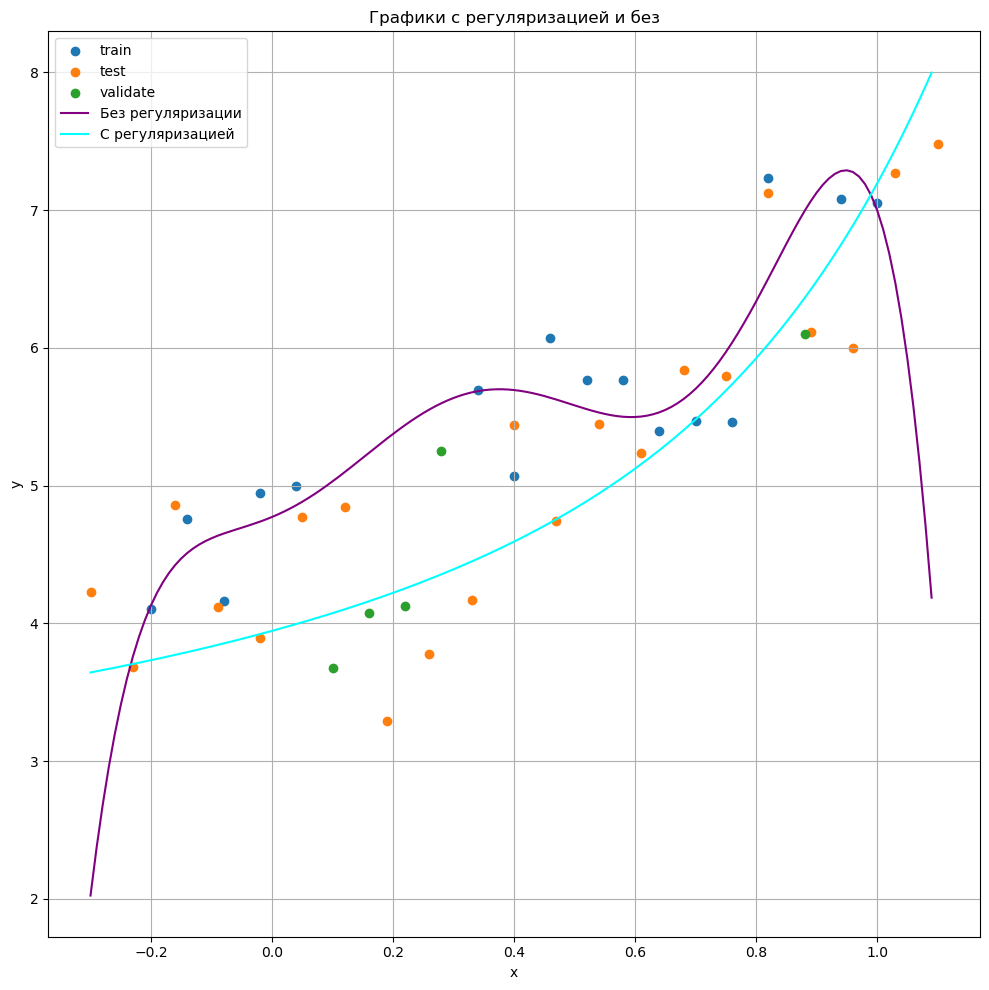

In [276]:
sol_without_lam = numpy.linalg.inv(
    X_train_poly.T @ X_train_poly) @ (X_train_poly.T @ y_train)
coef = best_lambda * numpy.eye(X_train_poly.shape[1])
sol_with_lam = numpy.linalg.inv(
    X_train_poly.T @ X_train_poly + coef) @ (X_train_poly.T @ y_train)
x_plot = numpy.arange(
    min(x_train.min(), x_test.min(), x_validate.min()),
    max(x_train.max(), x_test.max(), x_validate.max()),
    0.01).reshape(-1, 1)
x_plot_poly = numpy.hstack([x_plot**i for i in range(k+1)])
y_without_lam = x_plot_poly @ sol_without_lam
y_with_lam = x_plot_poly @ sol_with_lam
plt.figure(figsize=(10, 10))
plt.scatter(x_train, y_train, label="train")
plt.scatter(x_test, y_test, label="test")
plt.scatter(x_validate, y_validate, label="validate")
plt.plot(x_plot, y_without_lam, label="Без регуляризации", color="purple")
plt.plot(x_plot, y_with_lam, label="С регуляризацией", color="aqua")
plt.title("Графики с регуляризацией и без")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**6. [0.25 балла]** Чем первый из них выгодно отличается от второго?

График без регуляризации сильно колеблется, демонстрируя признаки переобучения: так как модель обучена на одном типе данных, на другом она неустойчива. В то же время график многочлена с регуляризацией более гладкий и лучше демонстрирует зависимость, поэтому такой многочлен более "универсален" на различных тестовых данных.

**7. [0.75 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$ ($k \leqslant n$), $y \in \mathbb{R}^n$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k$. Решите теоретически следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$
(То есть найдите все векторы $a \in \mathbb{R}^k$, для которых выражение слева принимает наименьшее возможное значение.) В частности, докажите существование решений и укажите их количество в зависимости от входных данных.

Чтобы найти точки экстремума функции, возьмем производную. Приравняем её к нулю. 
Функция имеет вид:  

  $L(a) = ‖Xa - y‖^{2} + \lambda ‖a‖^{2} = (Xa - y)^{T}(Xa - y) + \lambda a^{T}a$

По правилам векторно-матричного дифференцирования имеем:

- $d/da (‖Xa - y‖^{2}) = 2 X^{T}(Xa - y)$
- $d/da (\lambda‖a‖^{2}) = 2\lambda a$

Тогда производная всей функции:  
  $2X^{T}X a − 2X^{T}y + 2\lambda a = 0 ⇒ (X^{T}X + \lambda E) a = X^{T}y ⇒ a = (X^{T}X + \lambda E)^{-1} X^{T}y $

Имеем одну точку экстремума. Поскольку, если а стремится к $ +/- \infty$, функция стремится к $ +\infty$ => *а* - точка глобального минимума.

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

Ремарка о количестве решений:

- Если $\lambda > 0, то (X^{T}X + \lambda E)$ — положительно определённая и обратимая матрица. 
  В этом случае существует единственное решение:

    $a = (X^{T}X + \lambda E)^{-1} X^{T}y$

- Если $\lambda = 0$, то задача сводится к обычной линейной регрессии.
  При условии rk(X) = k матрица $X^{T}X$ тоже обратима, и снова  
  существует единственное решение:

    $a = (X^{T}X)^{-1} X^{T}y$


**8. [0.25 балла]** Попробуйте объяснить, почему регуляризовать (штрафовать за слишком большую абсолютную величину) коэффициент при константном признаке (который состоит из одних единиц) — плохая идея.

Свободный член не является показателем переобучения, поэтому регуляризировать его нет смысла. Более того, если это сделать, то это приведет к ошибке в предсказаниях: модель будет завышать или занижать значения.

**9. [0.5 балла]** Пусть теперь $\text{rk}~X < k$. Всегда ли в этом случае существует решение? Если существует, то является ли оно единственным? Ответ обоснуйте.

— Если $\lambda$ > 0, то матрица $(X^{T}X + \lambda E)$ положительно определена и обратима. Тогда существует единственное решение $a = (X^{T}X + \lambda E)^{-1} X^{T}y$

— Если $\lambda$ = 0, то матрица $X^{T}X$ вырожденная. Тогда уравнение $X^{T}X a = X^{T}y$ либо не имеет решений (если система несовместна), либо имеет бесконечно много решений (если совместна, но ранг < k)
Таким образом, решение при rk(X) < k существует не всегда или не является единственным.

**10. [0.25 балла]** Покажите теоретически, что если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $a$. Почему большие веса в линейной модели — плохо?

Если решений уравнения $X^{T}X a = X^{T}y$ бесконечно много, то множество его решений можно записать как $a = a_{0} + z$, и каждый из этих векторов дает одинаково хорошее приближение. Тогда мы можем найти такое решение, что его коэффициент будет сколь угодно большим: 
$a = a_{0} + tz$, $t -> \infty$
Это плохо по нескольким причинам:
1) Модель становится неустойчивой, чувствительной и появляются вычислительные ошибки
2) Возникает переобучение  

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Обозначим $X_{(t)} = (x_1\ldots x_t)^T$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

**1. [1 балл]** И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$, и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$. Опишите ваш алгоритм теоретически и обоснуйте его сложность.

Формула линейной регрессии для t объектов:

$\hat{a} = (X^T X)^{-1} X^T y$

Вместо хранения всей матрицы X и вектора y, можно хранить следующие матрицы:

- $A_t = X^T X = \sum_{i=1}^t x_i x_i^T \in \mathbb{R}^{n \times n}$
- $b_t = X^T y = \sum_{i=1}^t x_i y_i \in \mathbb{R}^{n \times 1}$

где каждый $x_{i}$ — это вектор признаков длины n. (n - количество признаков у каждого объекта, в том числе свободный член единица)

При поступлении новой пары $(x_{t+1}, y_{t+1})$ просто обновляем матрицы $A_{t}, b_{t}$:

- $A_{t+1} = A_t + x_{t+1} x_{t+1}^T$
- $b_{t+1} = b_t + x_{t+1} y_{t+1}$

Тогда новое  ршение будет иметь вид:
$
    \hat{a} = A_{t+1}^{-1} b_{t+1}
$

Это работает, поскольку матричная формула регрессии зависит только от **сумм** $\sum x_i x_i^T$ и $\sum x_i y_i$.  
Нам не нужно хранить все пары $(x_i, y_i)$, достаточно накапливать их вклады в $A$ и $b$.

Временная сложность такого алгоритма: $O(n^2)$.



**2. [2 балла]** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(5x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

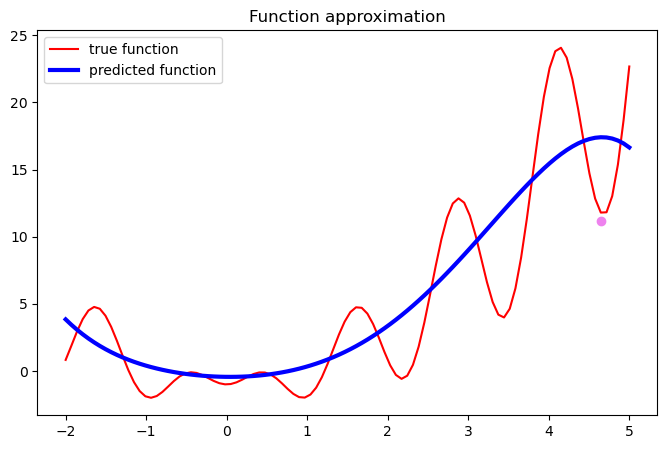

In [317]:
import numpy as np
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack([x_grid.reshape((100,1))**j for j in range(6)])
y_grid = f_true(x_grid)

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def func(k, X):
    return np.hstack([X.reshape(-1, 1) ** i for i in range(k+1)])

x_gr = func(5, x_grid)
X = None
Xy = None
lambda_reg = 1e-6

for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()

    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    poly_new = func(5, np.array([x_new]))
    if X is None:
        X = poly_new.T @ poly_new
    else:
        X += poly_new.T @ poly_new
    if Xy is None:
        Xy = y_new * poly_new.T
    else:
        Xy += y_new * poly_new.T

    # the rest of the code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.figure(figsize=(8, 5))
        plt.plot(x_grid,y_grid, color='red', label='true function')
        plt.scatter(x_new, y_new, color='violet')

        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        X_reg = X + lambda_reg*np.eye(X.shape[0])
        sol = np.linalg.inv(X_reg) @ Xy
        y_pred = x_gr @ sol
        plt.title("Function approximation")
        plt.plot(x_grid, y_pred, color='blue', linewidth=3, label='predicted function')
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ — матрица с ортонормированными столбцами, а $R$ — верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ — столбцы матрицы $A$, $q_1,\ldots,q_t$ — столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ — это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.